In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados para dataframe

df_salario = pd.read_csv("./dataset/1702317703683-attachment.csv")

In [3]:
df_salario

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
...,...,...,...
995,5,10,1037.35
996,7,2,668.01
997,118,6,17511.13
998,94,10,8938.96


In [4]:
df_salario.head(5)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


In [5]:
df_salario.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


In [6]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [7]:
df_salario_eda = df_salario.copy()

In [8]:
df_salario_bucketing = df_salario.copy()

In [9]:
df_salario_eda.head(5
                    )

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


### EDA

In [10]:
# verificar se temos valores ausentes

df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

<Axes: xlabel='tempo_na_empresa'>

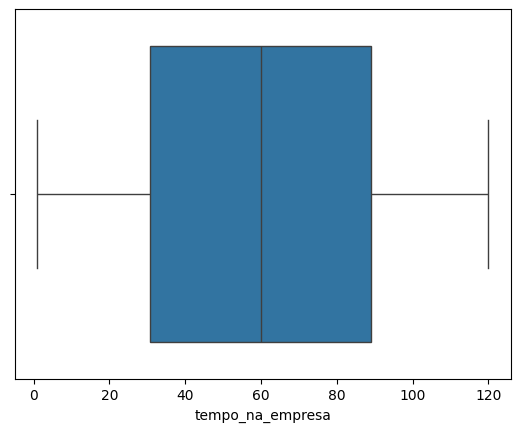

In [11]:
# detectar outliers

sns.boxplot(df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

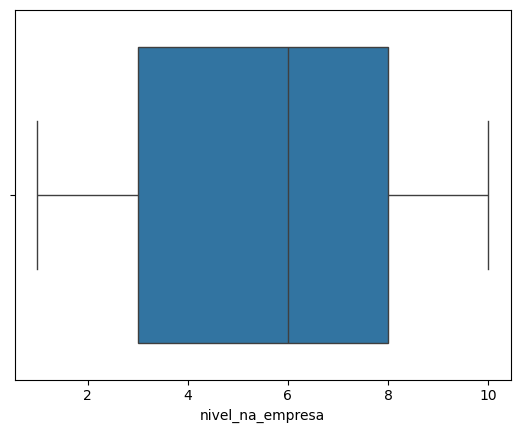

In [12]:
sns.boxplot(df_salario_eda, x='nivel_na_empresa')


<Axes: xlabel='salario_em_reais'>

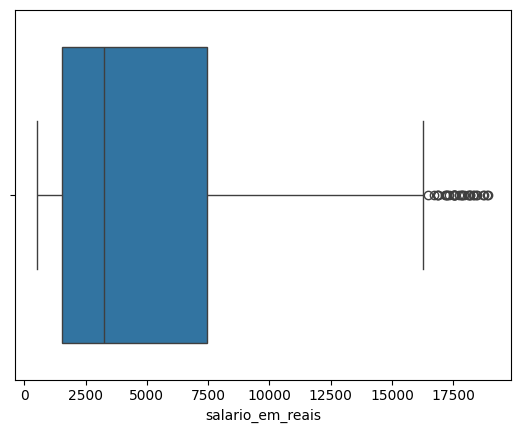

In [13]:
sns.boxplot(df_salario_eda, x='salario_em_reais')


mesmo com outliers na variavel salario em reais apos uma conversa com RH foi confirmado que esse valores sao validos e realmente existem

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

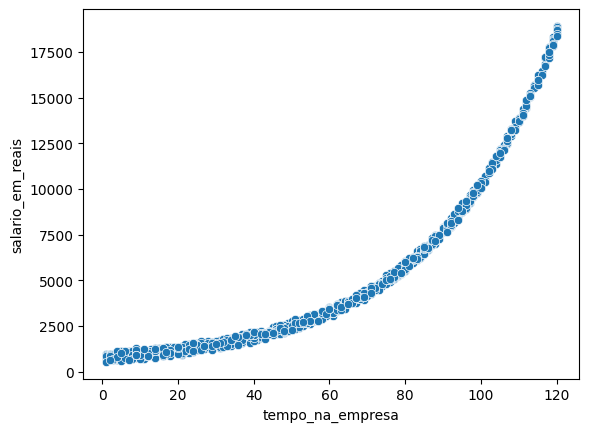

In [14]:
#fazendo cruzamento de variaveis numericas
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

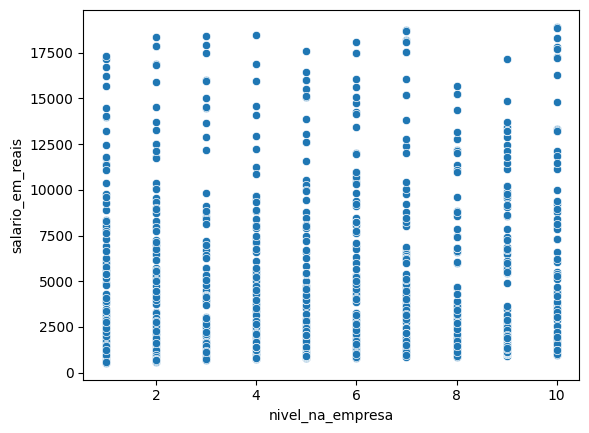

In [15]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')


<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

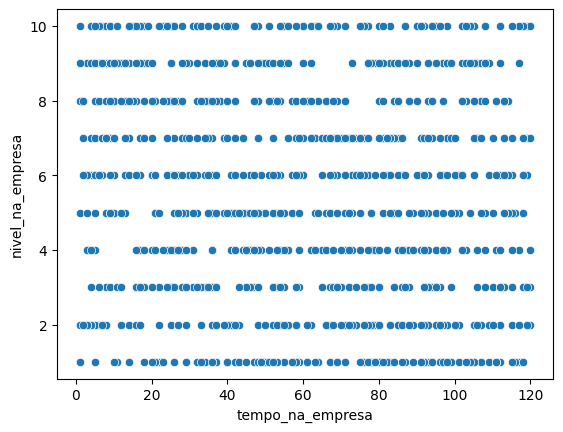

In [16]:
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='nivel_na_empresa')


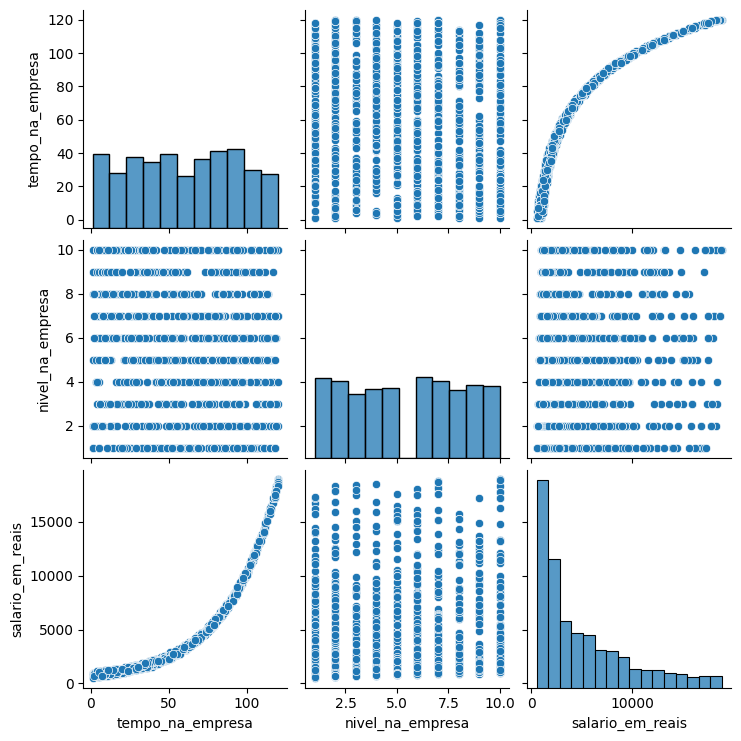

In [17]:
#pairplot para mostrar todos graficos juntos
sns.pairplot(df_salario_eda)

<Axes: >

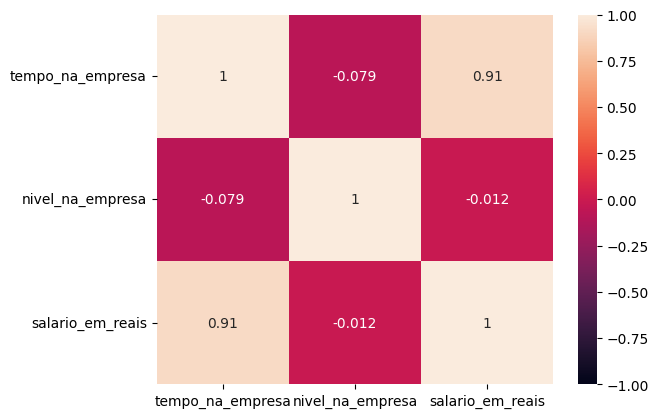

In [18]:
#Nivel de correlação
#mapa de calor

sns.heatmap(df_salario_eda.corr(), vmin=-1,vmax=1,annot=True)

<Axes: >

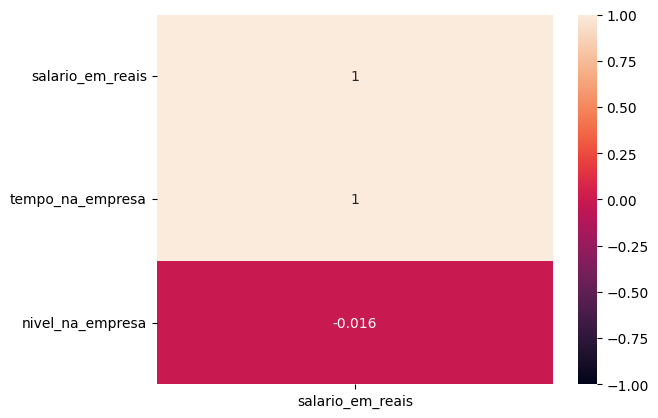

In [19]:
#mapa de calor em ranking

sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1,vmax=1, annot=True)

usando spearman que é melhor para valores lineares ou seja indicativo grande que esses dados nao semguem uma distribuição linear

In [20]:
#Bucketing

bins_tempo_empresa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_empresa = [
    "0-9", "10-19", "20-29", "30-39", "40-49", "50-59", 
    "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", "120-129"
]
df_salario_bucketing['escala_tempo']= pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_empresa,labels=labels_tempo_empresa,include_lowest=True)


In [21]:
df_salario_bucketing.head(5)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

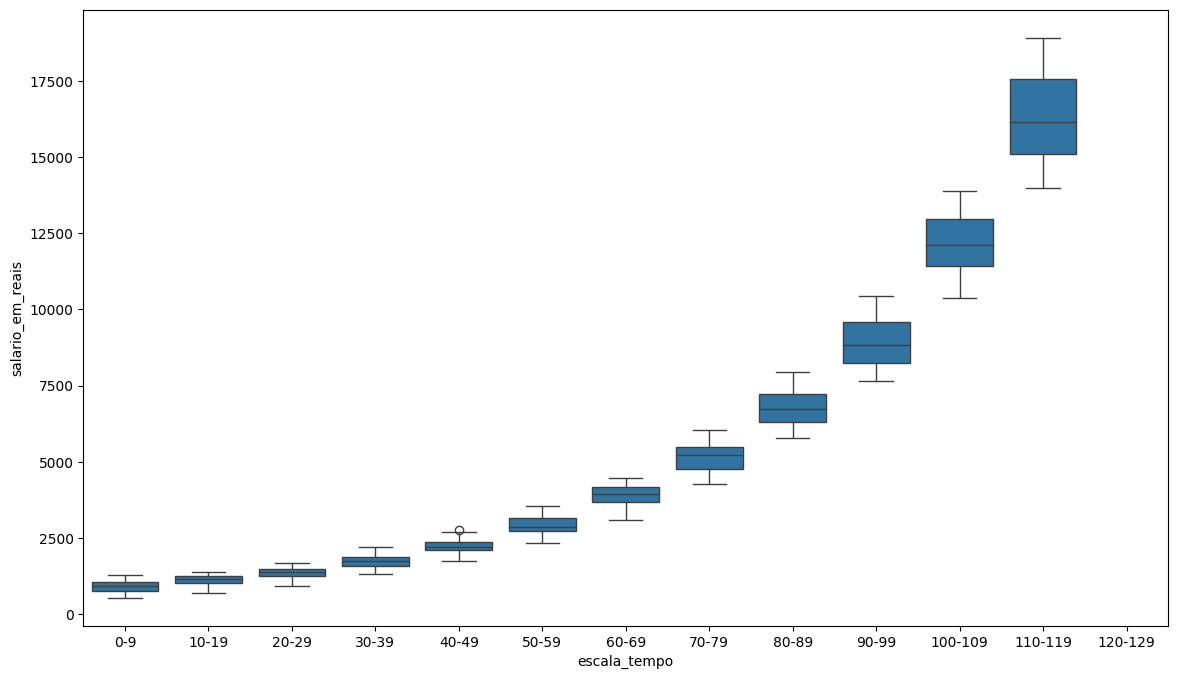

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

EDA Concluida

### Treinar modelo Linear

In [23]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error

import numpy as np

In [24]:
# Dividir o dataset em treino e teste

X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']


Você divide seus dados em K partes (ou "folds").
O modelo é treinado e testado K vezes, cada vez com uma parte diferente como teste.

📦 Exemplo com K=5:

Divide os 100 dados em 5 partes de 20.

Na 1ª vez: usa os 20 da 1ª parte como teste e os outros 80 como treino.

Na 2ª vez: os 20 da 2ª parte viram teste, e o resto vira treino.

E assim vai, até todas as partes terem sido usadas como teste uma vez.



In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [26]:
#Bloco para treinamento do modelo

#pipeline para padronizar as variaveis numericas

#Nome das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformes para colunas numericas 
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler())
])

# criar um ColumnTransformer

preprocessor = ColumnTransformer(
  transformers=[
    ('nume', transformer_numericas, colunas_numericas)
  ]
)

# Criando o pipeline principal = Pre processamento + Treinamento

model_regr = Pipeline(steps=[('preprocessor', preprocessor ),
                             ('regressor', LinearRegression())])

#Armazenar o RMSE Treino e teste

rmse_scores_fold_train = []
rmse_scores_fold_test = []

#Armazenar R2 Scores de teste
r2score_fold_test = []

#Armazenar Residuos
residuos = []

#Armazenar Predições
y_pred_total = []

for train_index,test_index in kf.split(X):
  X_train,X_test = X.iloc[train_index], X.iloc[test_index]
  y_train,y_test = y.iloc[train_index], y.iloc[test_index]

  #Treinando o modelo
  model_regr.fit(X_train,y_train)

  #fazendo predições Treino e teste
  y_pred_train = model_regr.predict(X_train)
  y_pred_test = model_regr.predict(X_test)

  #Calcular metricas

  rmse_train = root_mean_squared_error(y_train, y_pred_train) 
  rmse_test = root_mean_squared_error(y_test, y_pred_test) 
  r2score_test = r2_score(y_test,y_pred_test)
  residuos_test = np.array(y_test - y_pred_test)

  #Armazenar as metricas
  rmse_scores_fold_train.append(rmse_train)
  rmse_scores_fold_test.append(rmse_test)
  r2score_fold_test.append(r2score_test)
  residuos.append(residuos_test)
  y_pred_total.append(y_pred_test)


rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = (rmse_test_final - rmse_train_final ) / rmse_train_final
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)






### Analise de metricas

In [27]:
print(f"RMSE Treino: {rmse_train_final:.2f}")
print(f"RMSE Teste: {rmse_test_final:.2f}")
print(f"R2 Score Teste: {r2score_test_final:.2f}")
print(f"Percentual de RMSE: {percentual_rmse_final:.2%}")

RMSE Treino: 1882.83
RMSE Teste: 1886.45
R2 Score Teste: 0.83
Percentual de RMSE: 0.19%


### Analise de residuos - modelo linear

In [28]:
# Transformar os residuos na esca padrao
# (X-media) / desvio padrao
from scipy.stats import zscore 
residuos_std = zscore(residuos)


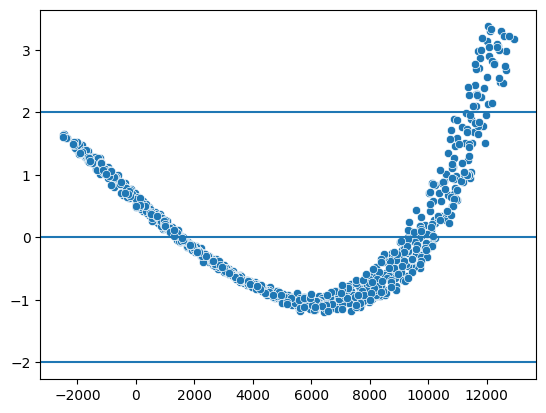

In [29]:
# Verificar linearidade dos resuduos: Valores entre -2 e +2 (escala padrao)
#verificar homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)


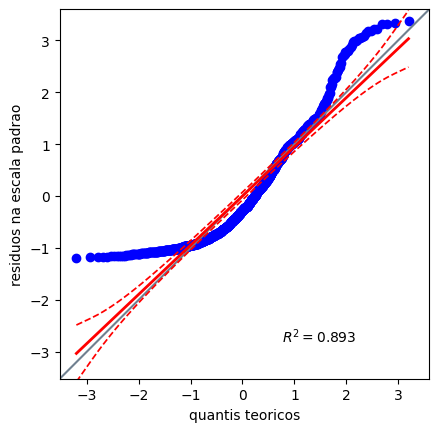

In [30]:
# Checar se residuos seguem uma distribição normal
#QQ plot
import pingouin as pg

plt.Figure(figsize=(14,8))
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("quantis teoricos")
plt.ylabel("residuos na escala padrao")
plt.show()




In [32]:
# Teste de normalidade - shapiro-wilk
# SE P-VALUE > 0.05 NAO REJEITAMOS A HIPOTESE NULA OU SEJA OS DADOS NAO SEGUEM UM DISTRIBUIÇÃO NAOOO NORMAL
# SE P-VALUE FOR < 0.05 ENTAO REJEITAMOS A H0 E ASSUMIMOS QUE OS DADOS NAO SEGUEM UMA DISTRIBUIÇÃO NORMAL
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatisticas teste{stat_shapiro} e P-value {p_value_shapiro}")

Estatisticas teste0.891969217965228 e P-value 7.013497918013492e-26


In [34]:
# Teste de normalidade - Kolmogorob-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estatisticas teste{stat_ks} e P-value {p_value_ks}")


Estatisticas teste0.5939999999999955 e P-value 0.0


In [36]:
# Teste de normalidade - Lillifors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod='table')
print(f"Estatisticas teste {stat_ll} e P-value {p_value_ll}")

Estatisticas teste 0.11825983774680088 e P-value 0.0009999999999998899


### Treinar modelo polinomial

In [42]:
# Exemplo de criação de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [43]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [49]:
#Bloco para treinamento do modelo

#graus_polynomial = [1,2,3,4,5,6,7,8,9,10]
graus_polynomial = [4]
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:



  #pipeline para padronizar as variaveis numericas

  #Nome das colunas
  colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

  # Transformes para colunas numericas 
  transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
  ])

  # criar um ColumnTransformer

  preprocessor = ColumnTransformer(
    transformers=[
      ('nume', transformer_numericas, colunas_numericas)
    ]
  )

  #Criar features POlinomiais
  poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

  # Criando o pipeline principal = Pre processamento + Treinamento

  model_poly = Pipeline(steps=[('preprocessor', preprocessor ),
                               ('poly_features', poly_feat),
                              ('regressor', LinearRegression())])

  #Armazenar o RMSE Treino e teste

  rmse_scores_fold_train = []
  rmse_scores_fold_test = []

  #Armazenar R2 Scores de teste
  r2score_fold_test = []

  #Armazenar Residuos
  residuos = []

  #Armazenar Predições
  y_pred_total = []

  for train_index,test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]

    #Treinando o modelo
    model_poly.fit(X_train,y_train)

    #fazendo predições Treino e teste
    y_pred_train = model_poly.predict(X_train)
    y_pred_test = model_poly.predict(X_test)

    #Calcular metricas

    rmse_train = root_mean_squared_error(y_train, y_pred_train) 
    rmse_test = root_mean_squared_error(y_test, y_pred_test) 
    r2score_test = r2_score(y_test,y_pred_test)
    residuos_test = np.array(y_test - y_pred_test)

    #Armazenar as metricas
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_pred_test)


  rmse_train_final = np.mean(rmse_scores_fold_train)
  rmse_test_final = np.mean(rmse_scores_fold_test)
  r2score_test_final = np.mean(r2score_fold_test)
  percentual_rmse_final = (rmse_test_final - rmse_train_final ) / rmse_train_final
  residuos = np.array(residuos).reshape(-1)
  y_pred_total = np.array(y_pred_total).reshape(-1)

  rmse_train_values.append(rmse_train_final)
  rmse_test_values.append(rmse_test_final)
  r2score_test_values.append(r2score_test_final)
  percentual_rmse_values.append(percentual_rmse_final)






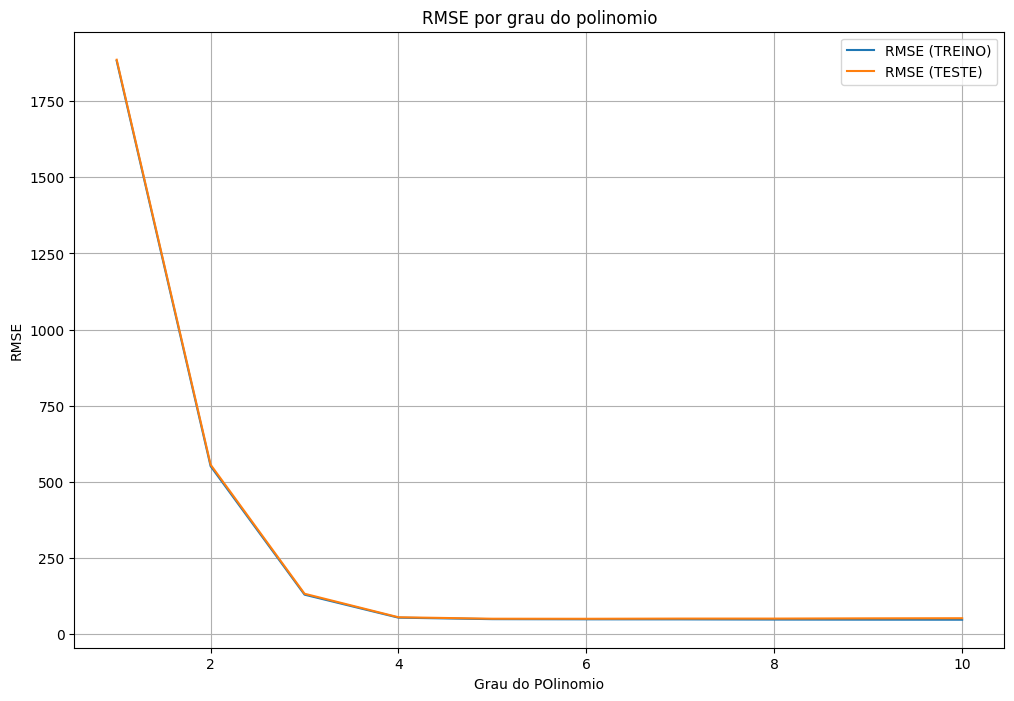

In [47]:
# Analise Grafica modelo Polinomial - comparar rmse por grau de polinomio

plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label = 'RMSE (TREINO)')
plt.plot(graus_polynomial, rmse_test_values, label = 'RMSE (TESTE)')
plt.xlabel('Grau do POlinomio')
plt.ylabel('RMSE')
plt.title("RMSE por grau do polinomio")
plt.legend()
plt.grid(True)

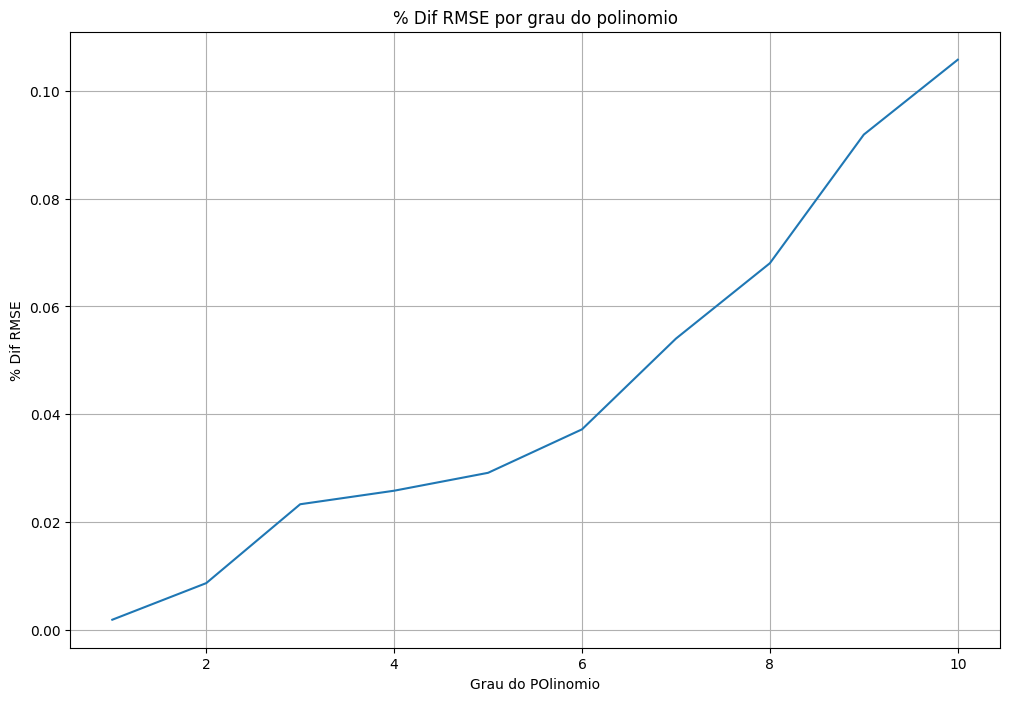

In [48]:
# Analise Grafica modelo Polinomial - comparar percentual de diferença RMSE (treino e teste)

plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label = 'RMSE (TREINO)')
plt.xlabel('Grau do POlinomio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por grau do polinomio')
plt.grid(True)

### Analise de metricas - Modelo Poly

In [50]:
print(f"RMSE Treino: {rmse_train_final:.2f}")
print(f"RMSE Teste: {rmse_test_final:.2f}")
print(f"R2 Score Teste: {r2score_test_final:.2f}")
print(f"Percentual de RMSE: {percentual_rmse_final:.2%}")

RMSE Treino: 53.33
RMSE Teste: 54.71
R2 Score Teste: 1.00
Percentual de RMSE: 2.58%


### Analise de residuos - modelo Polinomial

In [51]:
# Transformar os residuos na esca padrao
# (X-media) / desvio padrao
from scipy.stats import zscore 
residuos_std = zscore(residuos)


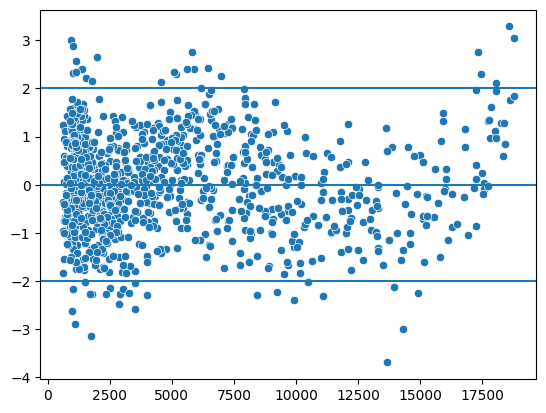

In [52]:
# Verificar linearidade dos resuduos: Valores entre -2 e +2 (escala padrao)
#verificar homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)


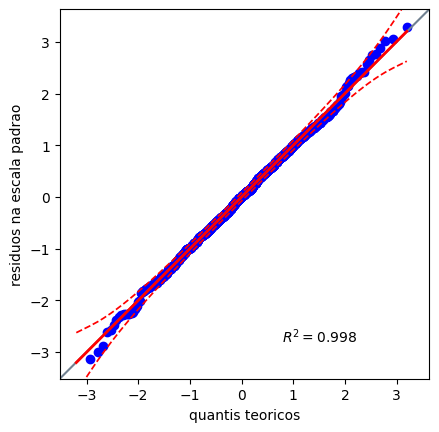

In [53]:
# Checar se residuos seguem uma distribição normal
#QQ plot
import pingouin as pg

plt.Figure(figsize=(14,8))
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("quantis teoricos")
plt.ylabel("residuos na escala padrao")
plt.show()




In [54]:
# Teste de normalidade - shapiro-wilk
# SE P-VALUE > 0.05 NAO REJEITAMOS A HIPOTESE NULA OU SEJA OS DADOS NAO SEGUEM UM DISTRIBUIÇÃO NAOOO NORMAL
# SE P-VALUE FOR < 0.05 ENTAO REJEITAMOS A H0 E ASSUMIMOS QUE OS DADOS NAO SEGUEM UMA DISTRIBUIÇÃO NORMAL
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatisticas teste{stat_shapiro} e P-value {p_value_shapiro}")

Estatisticas teste0.9986951372205322 e P-value 0.6852797159659514


In [55]:
# Teste de normalidade - Kolmogorob-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estatisticas teste{stat_ks} e P-value {p_value_ks}")


Estatisticas teste0.48237446499530856 e P-value 1.2202460106524514e-214


In [56]:
# Teste de normalidade - Lillifors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod='table')
print(f"Estatisticas teste {stat_ll} e P-value {p_value_ll}")

Estatisticas teste 0.013637346894986191 e P-value 0.9566270022044506
